In [3]:
#必要なパッケージのインポート

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import reservoirpy as rpy

from scipy.integrate import solve_ivp
import pandas as pd
from reservoirpy.observables import nrmse, rsquare

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


rpy.verbosity(0)

from reservoirpy.nodes import Reservoir, Ridge
from reservoirpy.datasets import mackey_glass

# just a little tweak to center the plots, nothing to worry about
from IPython.core.display import HTML
HTML("""
<style>
.img-center {
    display: block;
    margin-left: auto;
    margin-right: auto;
    }
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    }
</style>
""")

rpy.set_seed(42)

%time


CPU times: user 6 µs, sys: 7 µs, total: 13 µs
Wall time: 25.7 µs


Plot saved as '/home/kuno/my_project/VDP/VDP_analysis/comparison/stddev/std_dev_comparison_2010.pdf'.


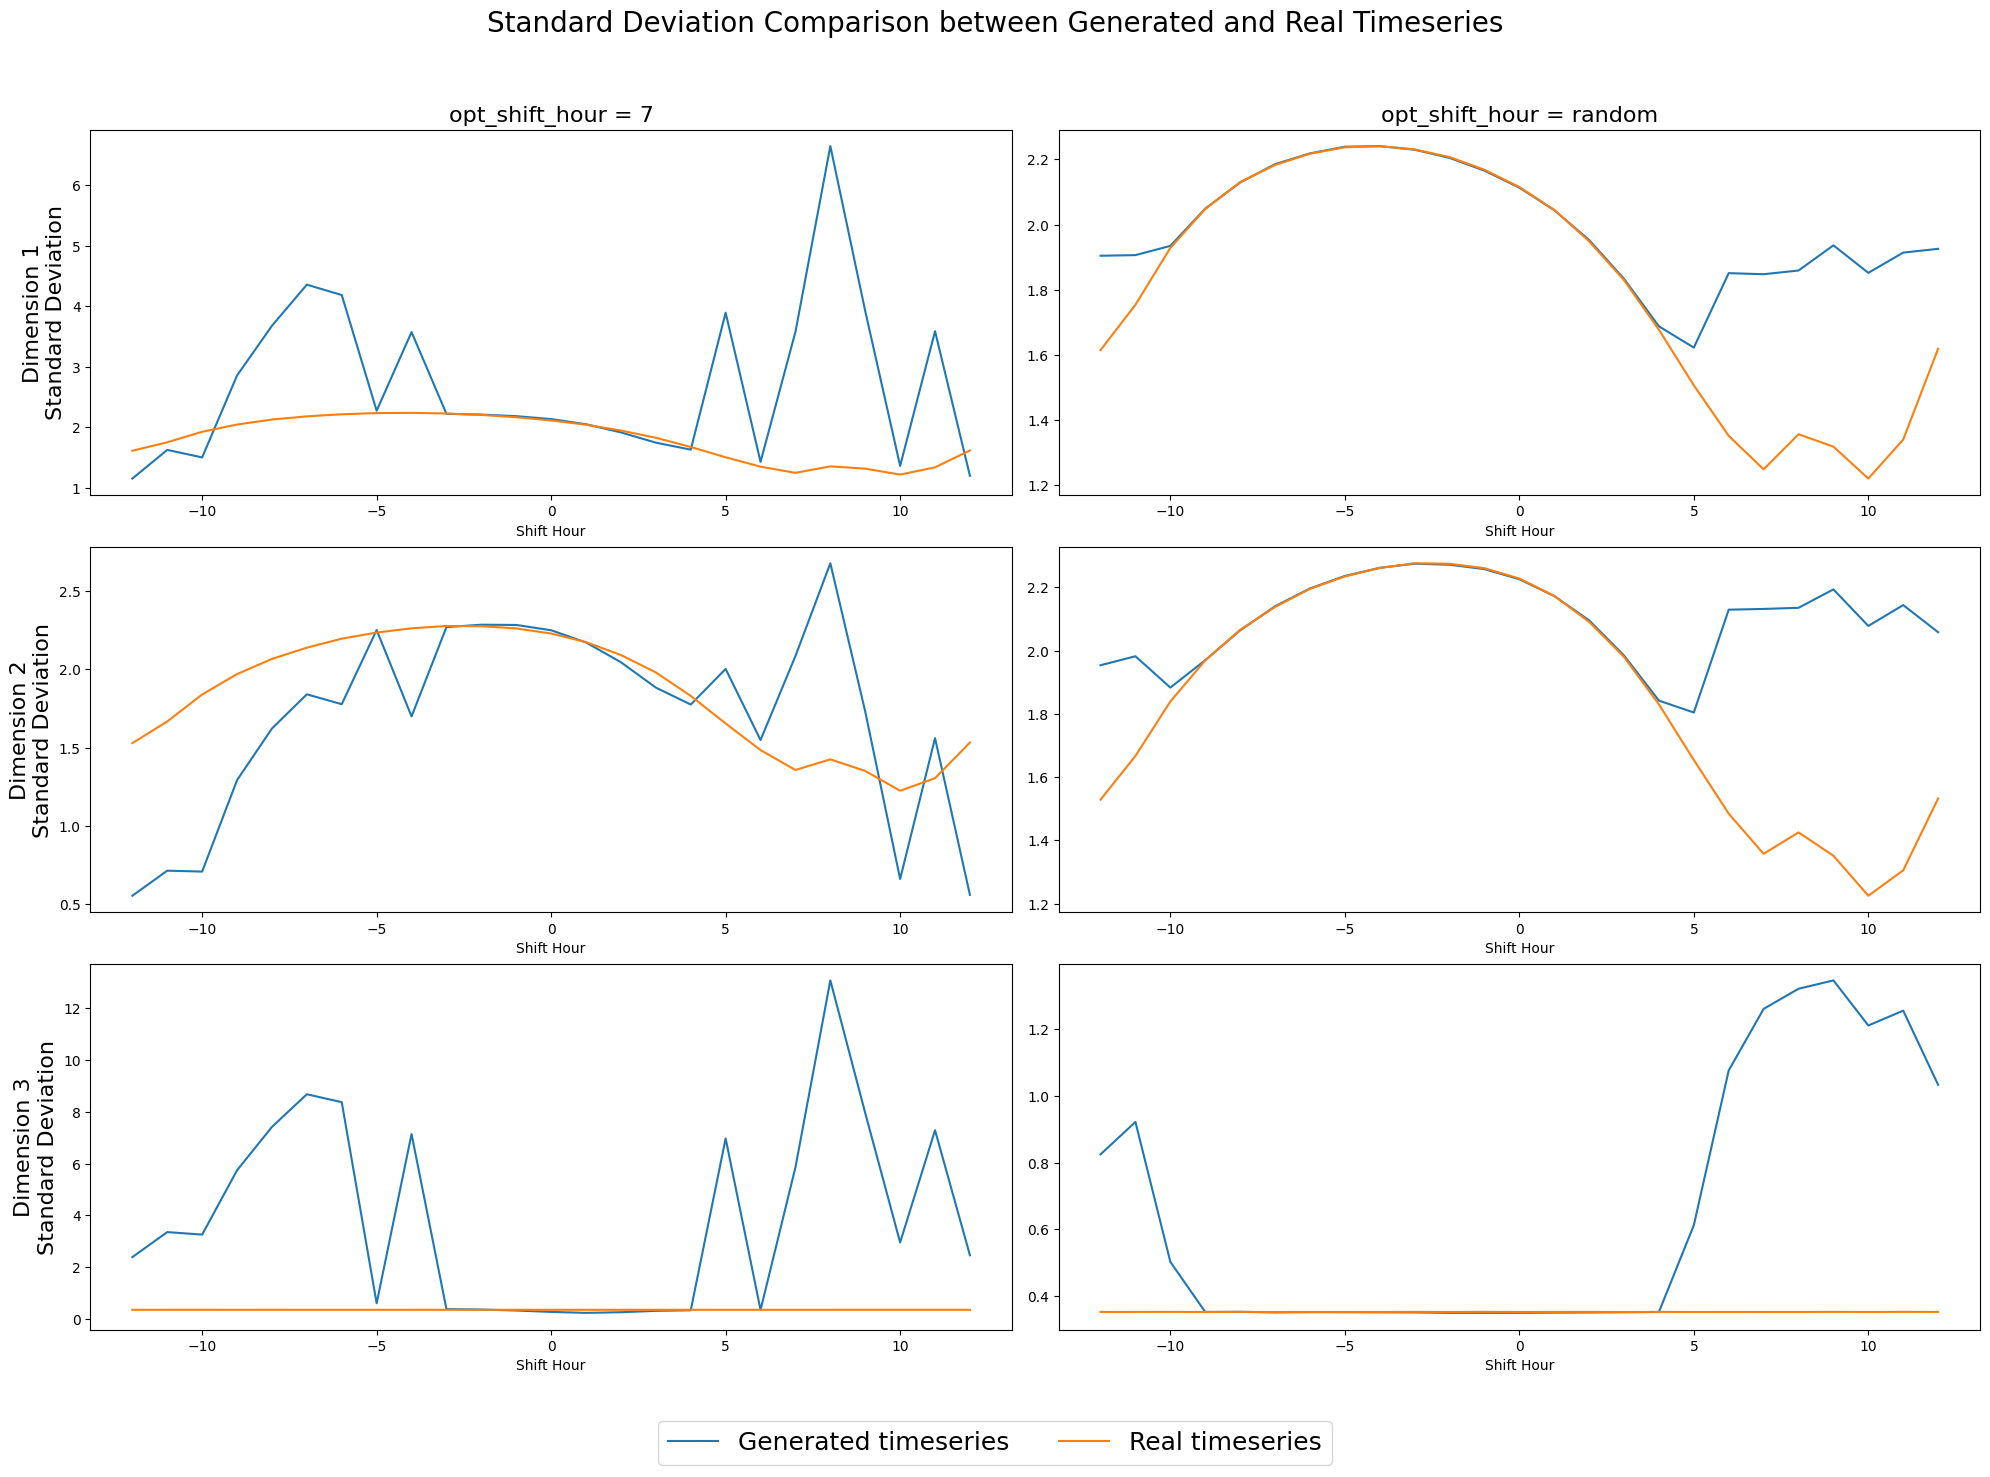

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def process_data(opt_shift_hour, type='val'):
    dir_name = f"stddev/stddev_{type}_{opt_shift_hour}"
    os.makedirs(dir_name, exist_ok=True)

    std_dev_results = []  # 標準偏差の結果を格納するためのリスト

    for shift_hour in shift_hours:
        file_path = f'/home/kuno/my_project/VDP/VDP_analysis/comparison/{opt_shift_hour}/stats/opt_{opt_shift_hour}_VDP_{type}/VDP_{shift_hour}.csv'
        
    
        data_df = pd.read_csv(file_path, names=['Column1', 'Column2', 'Column3'])
        std_dev_per_column = data_df.std()

        std_dev_results.append({
            'shift_hour': shift_hour,
            'StdDev_Column1': std_dev_per_column['Column1'],
            'StdDev_Column2': std_dev_per_column['Column2'],
            'StdDev_Column3': std_dev_per_column['Column3']
        })

    return pd.DataFrame(std_dev_results)

def plot_std_dev(opt_shift_hours, shift_hours, save_pdf=False, pdf_file_name='std_dev_comparison.pdf'):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
    fig.suptitle('Standard Deviation Comparison between Generated and Real Timeseries', fontsize=20)

    for i, opt_shift_hour in enumerate(opt_shift_hours):
        # 各列の最上部にタイトルを設定
        axes[0, i].set_title(f'opt_shift_hour = {opt_shift_hour}', fontsize=16)

        for j in range(1, 4):
            ax = axes[j-1, i]
            gen_data = process_data(opt_shift_hour, 'gen')
            val_data = process_data(opt_shift_hour, 'val')
            
            ax.plot(shift_hours, gen_data[f'StdDev_Column{j}'], label='Generated timeseries')
            ax.plot(shift_hours, val_data[f'StdDev_Column{j}'], label='Real timeseries')
            if i == 0:  # 左端のサブプロットにのみy軸ラベルを追加
                ax.set_ylabel(f'Dimension {j}\nStandard Deviation', fontsize=16)
            ax.set_xlabel('Shift Hour')

    # 全体の図に対して共通の凡例を追加
    lines, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(lines, labels, loc='lower center', ncol=2, fontsize = 18)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.1)

    if save_pdf:
        plt.savefig(pdf_file_name, format='pdf')
        print(f"Plot saved as '{pdf_file_name}'.")
    else:
        plt.show()

# shift_hours と opt_shift_hours の定義
shift_hours = list(range(-12, 13))
opt_shift_hours = [7, 'random']

# データの処理と描画、PDFに保存
plot_std_dev(opt_shift_hours, shift_hours, save_pdf=True, pdf_file_name='/home/kuno/my_project/VDP/VDP_analysis/comparison/stddev/std_dev_comparison_2010.pdf')